<a href="https://colab.research.google.com/github/sakline-mustak/portfolio/blob/main/Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  A real-life example of data engineering and machine learning project
- Titanic Dataset

In [127]:
import pandas as pd
import matplotlib.pyplot as plt


In [128]:
import random as rd
rd.seed(0)

## Loading and exploring the dataset

In [129]:
raw_data = pd.read_csv('Titanic_survival_project/titanic.csv')
raw_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Examine raw_data

In [130]:
print("The dataset has " , len(raw_data) , " rows.")

The dataset has  891  rows.


In [131]:
print("Columns (features of the dataset)")
raw_data.columns

Columns (features of the dataset)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [132]:
raw_data['Survived']

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [133]:
print(sum(raw_data["Survived"]), 'passengers survived out of', len(raw_data))

342 passengers survived out of 891


In [134]:
raw_data[['Name', 'Age']]

,Name,Age
0,"Braund, Mr. Owen Harris",22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
2,"Heikkinen, Miss. Laina",26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
4,"Allen, Mr. William Henry",35.0
...,...,...
886,"Montvila, Rev. Juozas",27.0
887,"Graham, Miss. Margaret Edith",19.0
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN
889,"Behr, Mr. Karl Howell",26.0


## Cleaning up the data

In [135]:
raw_data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


The Cabin columns is missing too many values to be useful. Let's drop it altogether.

In [136]:
print("The Cabin columns missing", raw_data["Cabin"].isna().sum(), "values out of 891. Let's Drop it")

The Cabin columns missing 687 values out of 891. Let's Drop it


In [137]:
clean_data = raw_data.drop('Cabin', axis = 1)
clean_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Other columns such as Age or Embarked are missing some values, but they can still be useful.

For the age column, let's fill in the missing values with the median of all ages.

For the Embarked column, let's make a new category called 'U', for Unknown port of embarkment.

In [138]:
clean_data["Age"]

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [139]:
median_age = clean_data["Age"].median()
print(median_age)

28.0


In [140]:
clean_data["Age"] = clean_data["Age"].fillna(median_age)

In [141]:
clean_data["Embarked"] = clean_data["Embarked"].fillna("U")

In [142]:
clean_data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [143]:
clean_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Saving our data for the future

In [144]:
clean_data.to_csv('./Titanic_survival_project/clean_titanic_data.csv', index=None)

## Feature Engineering : Transforming the features in our dataset before training the models

### Manipulating the features

---


*  One-hot encoding : turning categorical data into numerical data

---


*  Binning : Turning numerical data into categorical data

---


*  Feature selection

---



#  Turning categorical data into numerical data

One-hot encoding

In our dataset "Sex" and "Embarked" are categorical data .

We know, machine learning model take numbers as input, how do we input the word 'Male' / 'Female' / 'S' etc.

That's why we need a way to turn  categorical data into numerical data.



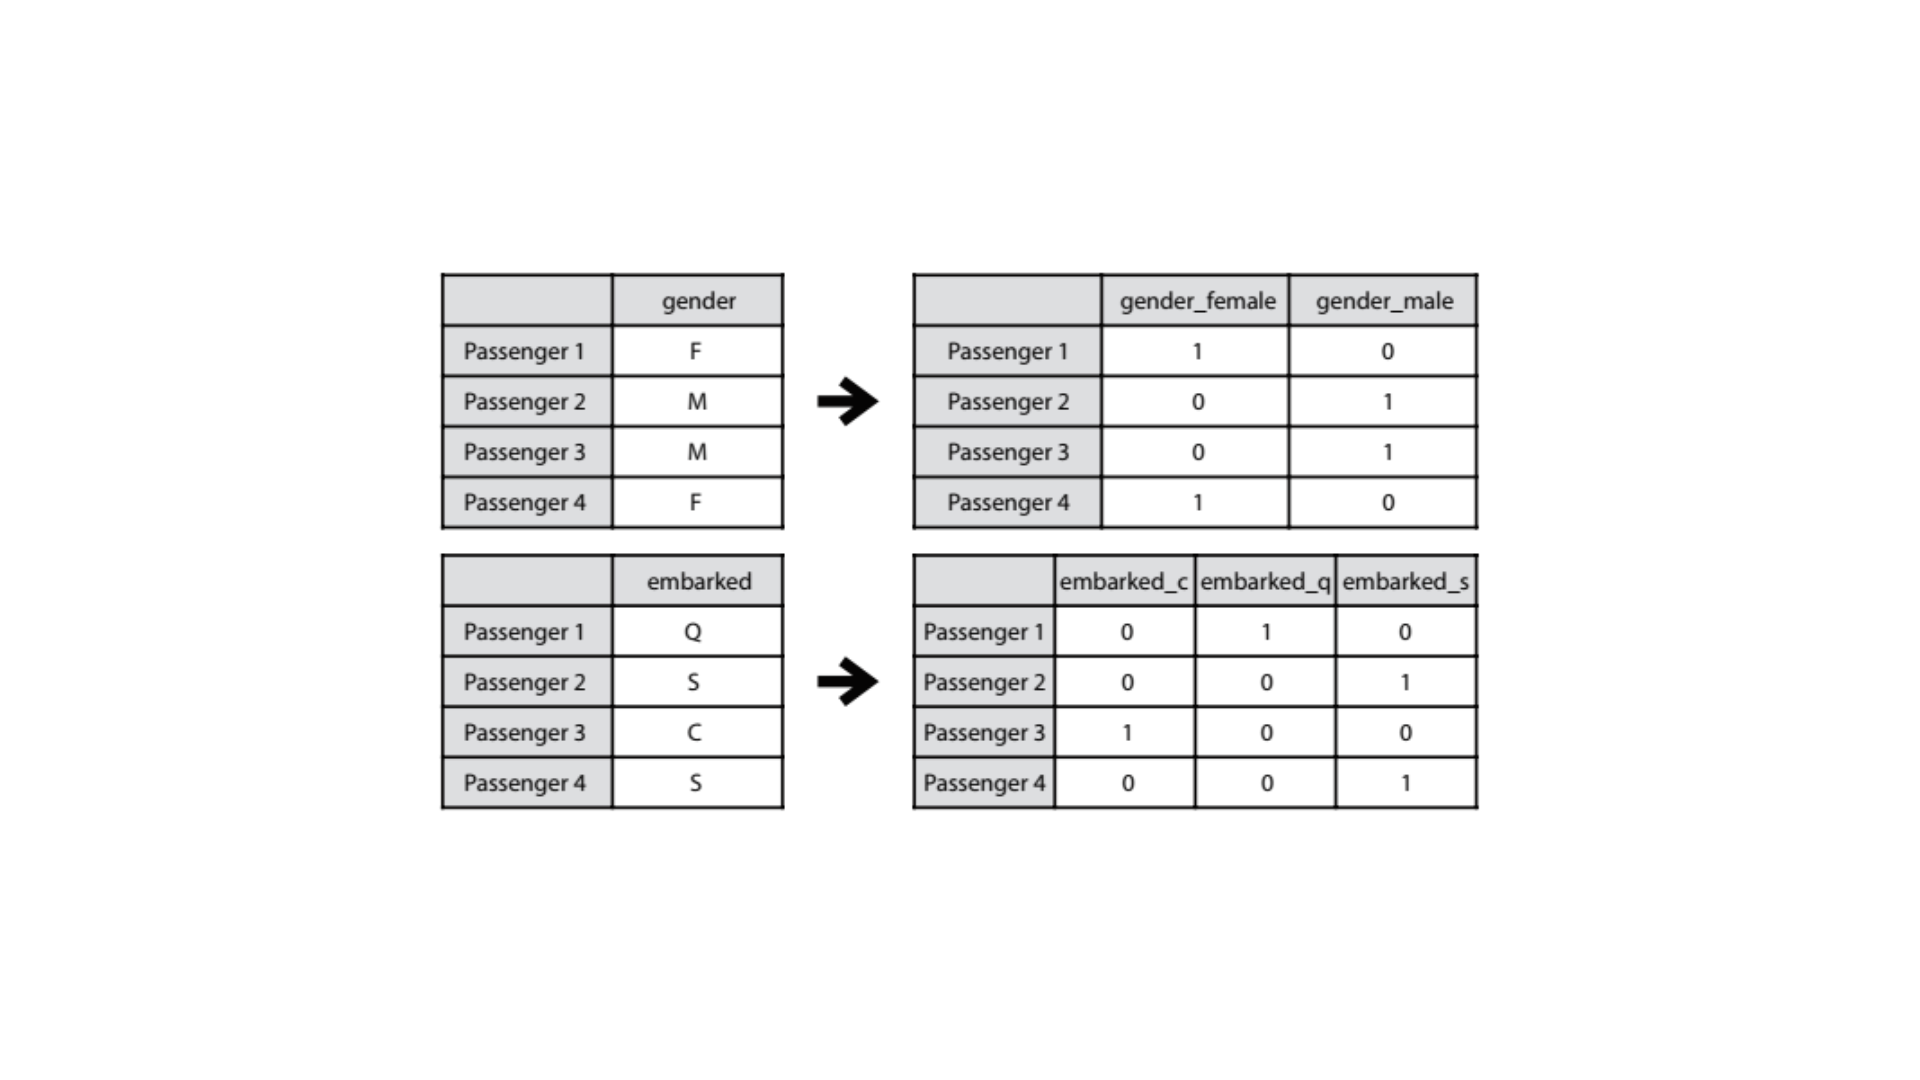

The Pandas function `get_dummies` helps us with one-hot encoding. We use it to create some new columns, then we attach these columns to the dataset, and we must not forget to remove the original column, because that information is redundant.

In [145]:
preprocessed_data = pd.read_csv('./Titanic_survival_project/clean_titanic_data.csv')
preprocessed_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


One-hot encoding the gender feature.

In [146]:
gender_columns = pd.get_dummies(preprocessed_data['Sex'], prefix="Sex")
print(gender_columns)

     Sex_female  Sex_male
0         False      True
1          True     False
2          True     False
3          True     False
4         False      True
..          ...       ...
886       False      True
887        True     False
888        True     False
889       False      True
890       False      True

[891 rows x 2 columns]


One-hot encoding the Embarked feature.

In [147]:
embarked_columns = pd.get_dummies(preprocessed_data['Embarked'], prefix="Embarked")
print(embarked_columns)

     Embarked_C  Embarked_Q  Embarked_S  Embarked_U
0         False       False        True       False
1          True       False       False       False
2         False       False        True       False
3         False       False        True       False
4         False       False        True       False
..          ...         ...         ...         ...
886       False       False        True       False
887       False       False        True       False
888       False       False        True       False
889        True       False       False       False
890       False        True       False       False

[891 rows x 4 columns]


Attach these columns to the dataset

Remove the redundant data columns

In [148]:
preprocessed_data = pd.concat([preprocessed_data, gender_columns], axis=1)
preprocessed_data = pd.concat([preprocessed_data, embarked_columns], axis=1)

In [149]:
preprocessed_data = preprocessed_data.drop(['Sex', 'Embarked'], axis=1)

In [150]:
preprocessed_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_U
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,False,True,False,False,True,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,True,False,True,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,True,False,False,False,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,True,False,False,False,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,False,True,False,False,True,False


A rule of thumb for when to one-hot encode or not

In [151]:
class_survived = preprocessed_data[['Pclass', 'Survived']]

first_class = class_survived[class_survived['Pclass'] == 1]
second_class = class_survived[class_survived['Pclass'] == 2]
third_class = class_survived[class_survived['Pclass'] == 3]

print("In first class", sum(first_class["Survived"])/len(first_class)*100 , "% of the passengers survived")
print("In second class", sum(second_class["Survived"])/len(second_class)*100 , "% of the passengers survived")
print("In third class", sum(third_class["Survived"])/len(third_class)*100 , "% of the passengers survived")

In first class 62.96296296296296 % of the passengers survived
In second class 47.28260869565217 % of the passengers survived
In third class 24.236252545824847 % of the passengers survived


### Turning numerical data into categorical data



*   Binning : A useful technique to bin the columns, split them into several buckets.





Binning the 'Age' column

In [153]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
categorized_age = pd.cut(preprocessed_data['Age'], bins)
preprocessed_data['Categorized_age'] = categorized_age
preprocessed_data = preprocessed_data.drop(['Age'], axis=1)

In [154]:
preprocessed_data.head()

,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_U,Categorized_age
0,1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,False,True,False,False,True,False,"(20, 30]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,True,False,True,False,False,False,"(30, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,True,False,False,False,True,False,"(20, 30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,True,False,False,False,True,False,"(30, 40]"
4,5,0,3,"Allen, Mr. William Henry",0,0,373450,8.0500,False,True,False,False,True,False,"(30, 40]"


In [155]:
categorized_age_colums = pd.get_dummies(preprocessed_data['Categorized_age'], prefix='Categorize_age')
preprocessed_data = pd.concat([preprocessed_data, categorized_age_colums], axis=1)
preprocessed_data = preprocessed_data.drop(['Categorized_age'], axis=1)

In [156]:
preprocessed_data.head()

,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,...,Embarked_S,Embarked_U,"Categorize_age_(0, 10]","Categorize_age_(10, 20]","Categorize_age_(20, 30]","Categorize_age_(30, 40]","Categorize_age_(40, 50]","Categorize_age_(50, 60]","Categorize_age_(60, 70]","Categorize_age_(70, 80]"
0,1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,False,True,...,True,False,False,False,True,False,False,False,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,True,False,...,False,False,False,False,False,True,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,True,False,...,True,False,False,False,True,False,False,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,True,False,...,True,False,False,False,False,True,False,False,False,False
4,5,0,3,"Allen, Mr. William Henry",0,0,373450,8.0500,False,True,...,True,False,False,False,False,True,False,False,False,False


Feature Selection : Getting rid of unnecessary features

In [158]:
preprocessed_data = preprocessed_data.drop(['Name', 'PassengerId', 'Ticket'], axis=1)

In [159]:
preprocessed_data.head()

,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_U,"Categorize_age_(0, 10]","Categorize_age_(10, 20]","Categorize_age_(20, 30]","Categorize_age_(30, 40]","Categorize_age_(40, 50]","Categorize_age_(50, 60]","Categorize_age_(60, 70]","Categorize_age_(70, 80]"
0,0,3,1,0,7.2500,False,True,False,False,True,False,False,False,True,False,False,False,False,False
1,1,1,1,0,71.2833,True,False,True,False,False,False,False,False,False,True,False,False,False,False
2,1,3,0,0,7.9250,True,False,False,False,True,False,False,False,True,False,False,False,False,False
3,1,1,1,0,53.1000,True,False,False,False,True,False,False,False,False,True,False,False,False,False
4,0,3,0,0,8.0500,False,True,False,False,True,False,False,False,False,True,False,False,False,False


# Saving dataset for future use

In [160]:
preprocessed_data.to_csv('./Titanic_survival_project/preprocessed_titanic_data.csv', index=None)

# Training Models